### Importing Libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import * 
from sklearn import datasets, linear_model

### EDA on Train and Test Datasets

In [154]:
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [155]:
test1 = pd.read_csv("test_YCcRUnU.csv")

In [156]:
train.shape,test.shape

((50882, 14), (21805, 13))

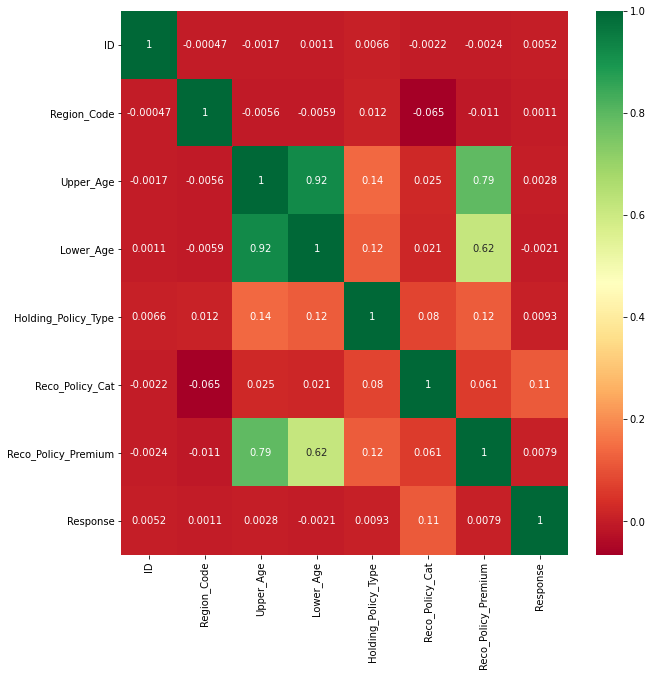

In [157]:
import seaborn as sns
corrmat = train.corr()
top_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_features].corr(),annot=True,cmap="RdYlGn")

In [158]:
pd.isnull(train).sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [159]:
pd.isnull(test).sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

### Combining Train and Test Data for Preprocessing

In [160]:
combine = pd.concat([train,test])
combine.shape

(72687, 14)

In [161]:
combine.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0


In [162]:
combine.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [163]:
combine.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [164]:
combine['Response'].fillna(value=-1,inplace=True)

In [165]:
combine['ID'].nunique()

72687

In [166]:
combine['Health Indicator'].fillna(value="Unknown",inplace=True)

In [167]:
combine.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [168]:
combine['Holding_Policy_Duration'] = combine['Holding_Policy_Duration'].replace("14+",15) 

In [169]:
combine['Holding_Policy_Type'].fillna(value=-1,inplace=True)

In [170]:
combine.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                   float64
dtype: object

In [171]:
combine['Holding_Policy_Duration'] = combine['Holding_Policy_Duration'].astype(float)

In [172]:
combine['Holding_Policy_Duration'].median()

5.0

In [173]:
combine['Holding_Policy_Duration'].fillna(value=0.0,inplace=True)

In [174]:
combine.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Label Encoding of Categorical Columns

In [175]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
combine['City_Code']=le.fit_transform(combine['City_Code'])
combine['Accomodation_Type']=le.fit_transform(combine['Accomodation_Type'])
combine['Reco_Insurance_Type']=le.fit_transform(combine['Reco_Insurance_Type'])
combine['Is_Spouse']=le.fit_transform(combine['Is_Spouse'])
combine['Health Indicator']=le.fit_transform(combine['Health Indicator'])

In [176]:
combine.dtypes

ID                           int64
City_Code                    int32
Region_Code                  int64
Accomodation_Type            int32
Reco_Insurance_Type          int32
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int32
Health Indicator             int32
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                   float64
dtype: object

In [177]:
train.shape,test.shape

((50882, 14), (21805, 13))

### Seperating the combined data into Train and Test (after preprocessing is performed)

In [178]:
X = combine[combine['Response']!=-1].drop(['ID','Response'], axis=1)
y = combine[combine['Response']!=-1]['Response']

test = combine[combine['Response']==-1].drop(['ID','Response'], axis=1)

X.shape, y.shape, test.shape

((50882, 12), (50882,), (21805, 12))

In [179]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Response, dtype: float64

### XGBoost Classifier

In [74]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred = model.predict(test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [101]:
df=pd.DataFrame({"ID":test1['ID'],"Response":y_pred})

In [102]:
df.head()

,ID,Response
0,50883,0.239403
1,50884,0.239403
2,50885,0.239403
3,50886,0.239403
4,50887,0.239403


In [103]:
df.to_csv('SubmissionANN.csv',index=False)

### Catboost Classifier

In [88]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(X,y)

Learning rate set to 0.055162
0:	learn: 0.6729982	total: 150ms	remaining: 2m 29s
1:	learn: 0.6579356	total: 189ms	remaining: 1m 34s
2:	learn: 0.6438932	total: 212ms	remaining: 1m 10s
3:	learn: 0.6319834	total: 228ms	remaining: 56.8s
4:	learn: 0.6213444	total: 242ms	remaining: 48.2s
5:	learn: 0.6115805	total: 263ms	remaining: 43.6s
6:	learn: 0.6029493	total: 278ms	remaining: 39.5s
7:	learn: 0.5958411	total: 295ms	remaining: 36.6s
8:	learn: 0.5891810	total: 312ms	remaining: 34.4s
9:	learn: 0.5832948	total: 333ms	remaining: 33s
10:	learn: 0.5786630	total: 353ms	remaining: 31.7s
11:	learn: 0.5742399	total: 373ms	remaining: 30.7s
12:	learn: 0.5706080	total: 387ms	remaining: 29.4s
13:	learn: 0.5672506	total: 405ms	remaining: 28.5s
14:	learn: 0.5641056	total: 420ms	remaining: 27.6s
15:	learn: 0.5609410	total: 435ms	remaining: 26.8s
16:	learn: 0.5582347	total: 448ms	remaining: 25.9s
17:	learn: 0.5558180	total: 465ms	remaining: 25.4s
18:	learn: 0.5537310	total: 481ms	remaining: 24.8s
19:	learn:

170:	learn: 0.5140259	total: 3.59s	remaining: 17.4s
171:	learn: 0.5139502	total: 3.61s	remaining: 17.4s
172:	learn: 0.5138832	total: 3.63s	remaining: 17.3s
173:	learn: 0.5137339	total: 3.64s	remaining: 17.3s
174:	learn: 0.5135952	total: 3.66s	remaining: 17.3s
175:	learn: 0.5135487	total: 3.68s	remaining: 17.3s
176:	learn: 0.5134679	total: 3.7s	remaining: 17.2s
177:	learn: 0.5133797	total: 3.72s	remaining: 17.2s
178:	learn: 0.5132723	total: 3.74s	remaining: 17.1s
179:	learn: 0.5132168	total: 3.76s	remaining: 17.1s
180:	learn: 0.5131070	total: 3.78s	remaining: 17.1s
181:	learn: 0.5130601	total: 3.8s	remaining: 17.1s
182:	learn: 0.5129720	total: 3.82s	remaining: 17.1s
183:	learn: 0.5129314	total: 3.84s	remaining: 17s
184:	learn: 0.5127478	total: 3.85s	remaining: 17s
185:	learn: 0.5125503	total: 3.87s	remaining: 17s
186:	learn: 0.5124323	total: 3.9s	remaining: 16.9s
187:	learn: 0.5123498	total: 3.91s	remaining: 16.9s
188:	learn: 0.5122488	total: 3.93s	remaining: 16.9s
189:	learn: 0.5121953

335:	learn: 0.4996112	total: 6.79s	remaining: 13.4s
336:	learn: 0.4995070	total: 6.8s	remaining: 13.4s
337:	learn: 0.4994117	total: 6.83s	remaining: 13.4s
338:	learn: 0.4993359	total: 6.85s	remaining: 13.3s
339:	learn: 0.4992497	total: 6.87s	remaining: 13.3s
340:	learn: 0.4991860	total: 6.89s	remaining: 13.3s
341:	learn: 0.4991351	total: 6.92s	remaining: 13.3s
342:	learn: 0.4990630	total: 6.94s	remaining: 13.3s
343:	learn: 0.4989564	total: 6.96s	remaining: 13.3s
344:	learn: 0.4988974	total: 6.98s	remaining: 13.2s
345:	learn: 0.4988149	total: 6.99s	remaining: 13.2s
346:	learn: 0.4987391	total: 7.02s	remaining: 13.2s
347:	learn: 0.4986738	total: 7.04s	remaining: 13.2s
348:	learn: 0.4985866	total: 7.07s	remaining: 13.2s
349:	learn: 0.4985201	total: 7.09s	remaining: 13.2s
350:	learn: 0.4984495	total: 7.11s	remaining: 13.1s
351:	learn: 0.4983846	total: 7.14s	remaining: 13.1s
352:	learn: 0.4983107	total: 7.16s	remaining: 13.1s
353:	learn: 0.4982685	total: 7.18s	remaining: 13.1s
354:	learn: 0

496:	learn: 0.4887848	total: 9.99s	remaining: 10.1s
497:	learn: 0.4887098	total: 10s	remaining: 10.1s
498:	learn: 0.4886462	total: 10s	remaining: 10.1s
499:	learn: 0.4886001	total: 10s	remaining: 10s
500:	learn: 0.4885383	total: 10.1s	remaining: 10s
501:	learn: 0.4884886	total: 10.1s	remaining: 10s
502:	learn: 0.4884196	total: 10.1s	remaining: 9.99s
503:	learn: 0.4883488	total: 10.1s	remaining: 9.96s
504:	learn: 0.4882587	total: 10.1s	remaining: 9.94s
505:	learn: 0.4882080	total: 10.2s	remaining: 9.91s
506:	learn: 0.4881372	total: 10.2s	remaining: 9.89s
507:	learn: 0.4880559	total: 10.2s	remaining: 9.87s
508:	learn: 0.4879682	total: 10.2s	remaining: 9.84s
509:	learn: 0.4879206	total: 10.2s	remaining: 9.82s
510:	learn: 0.4878590	total: 10.2s	remaining: 9.79s
511:	learn: 0.4878172	total: 10.3s	remaining: 9.77s
512:	learn: 0.4877453	total: 10.3s	remaining: 9.75s
513:	learn: 0.4876992	total: 10.3s	remaining: 9.73s
514:	learn: 0.4876384	total: 10.3s	remaining: 9.71s
515:	learn: 0.4875454	to

655:	learn: 0.4796347	total: 13s	remaining: 6.82s
656:	learn: 0.4796072	total: 13s	remaining: 6.8s
657:	learn: 0.4795458	total: 13s	remaining: 6.78s
658:	learn: 0.4794817	total: 13.1s	remaining: 6.76s
659:	learn: 0.4794309	total: 13.1s	remaining: 6.74s
660:	learn: 0.4793769	total: 13.1s	remaining: 6.71s
661:	learn: 0.4793134	total: 13.1s	remaining: 6.7s
662:	learn: 0.4792684	total: 13.1s	remaining: 6.68s
663:	learn: 0.4792153	total: 13.2s	remaining: 6.66s
664:	learn: 0.4791677	total: 13.2s	remaining: 6.64s
665:	learn: 0.4791152	total: 13.2s	remaining: 6.62s
666:	learn: 0.4790426	total: 13.2s	remaining: 6.6s
667:	learn: 0.4789668	total: 13.3s	remaining: 6.59s
668:	learn: 0.4789226	total: 13.3s	remaining: 6.57s
669:	learn: 0.4788751	total: 13.3s	remaining: 6.55s
670:	learn: 0.4788135	total: 13.3s	remaining: 6.53s
671:	learn: 0.4787637	total: 13.3s	remaining: 6.5s
672:	learn: 0.4787132	total: 13.3s	remaining: 6.49s
673:	learn: 0.4786628	total: 13.4s	remaining: 6.46s
674:	learn: 0.4785962	

822:	learn: 0.4706610	total: 16.2s	remaining: 3.48s
823:	learn: 0.4705874	total: 16.2s	remaining: 3.46s
824:	learn: 0.4705313	total: 16.2s	remaining: 3.44s
825:	learn: 0.4704886	total: 16.2s	remaining: 3.42s
826:	learn: 0.4704406	total: 16.2s	remaining: 3.4s
827:	learn: 0.4703699	total: 16.2s	remaining: 3.37s
828:	learn: 0.4703114	total: 16.3s	remaining: 3.35s
829:	learn: 0.4702395	total: 16.3s	remaining: 3.33s
830:	learn: 0.4702008	total: 16.3s	remaining: 3.31s
831:	learn: 0.4701332	total: 16.3s	remaining: 3.3s
832:	learn: 0.4700807	total: 16.3s	remaining: 3.27s
833:	learn: 0.4700077	total: 16.4s	remaining: 3.26s
834:	learn: 0.4699673	total: 16.4s	remaining: 3.24s
835:	learn: 0.4698992	total: 16.4s	remaining: 3.22s
836:	learn: 0.4698499	total: 16.4s	remaining: 3.2s
837:	learn: 0.4697886	total: 16.4s	remaining: 3.18s
838:	learn: 0.4697227	total: 16.5s	remaining: 3.16s
839:	learn: 0.4696648	total: 16.5s	remaining: 3.14s
840:	learn: 0.4696161	total: 16.5s	remaining: 3.12s
841:	learn: 0.4

983:	learn: 0.4623296	total: 19.3s	remaining: 315ms
984:	learn: 0.4622854	total: 19.4s	remaining: 295ms
985:	learn: 0.4622267	total: 19.4s	remaining: 275ms
986:	learn: 0.4621721	total: 19.4s	remaining: 255ms
987:	learn: 0.4621118	total: 19.4s	remaining: 236ms
988:	learn: 0.4620591	total: 19.4s	remaining: 216ms
989:	learn: 0.4620130	total: 19.5s	remaining: 197ms
990:	learn: 0.4619823	total: 19.5s	remaining: 177ms
991:	learn: 0.4619452	total: 19.5s	remaining: 157ms
992:	learn: 0.4618668	total: 19.5s	remaining: 138ms
993:	learn: 0.4618059	total: 19.5s	remaining: 118ms
994:	learn: 0.4617593	total: 19.6s	remaining: 98.3ms
995:	learn: 0.4617297	total: 19.6s	remaining: 78.6ms
996:	learn: 0.4616873	total: 19.6s	remaining: 59ms
997:	learn: 0.4616390	total: 19.6s	remaining: 39.3ms
998:	learn: 0.4616081	total: 19.7s	remaining: 19.7ms
999:	learn: 0.4615708	total: 19.7s	remaining: 0us


In [89]:
y_pred = clf.predict(test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [103]:
y.shape

(50882,)

### Hyper Parameter Optimization of XGBoost using Randomized Search CV

In [28]:
params={
 "subsample"        : [0.3,0.5,0.7,0.9],
 "colsample_bytree" : [0.3,0.5,0.7,0.9],
 "n_estimators"     : [1000,2000,3000,4000,5000],
 "learning_rate"    : [0.01, 0.05, 0.19, 0.25, 0.3],
 "max_depth"        : [11,13,15,17,19],
 "min_child_weight" : [1, 3, 5, 7 ],
 "nthread"          : [2,3,4,5],
 "gamma"            : [0.5,3,5,7,9],
 "max_delta_step"   : [1,2,3,4,5]
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [30]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [31]:
classifier=xgboost.XGBClassifier()

In [32]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [33]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 21.5min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 24.6min finished



 Time taken: 0 hours 26 minutes and 4.98 seconds.


In [34]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=4, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
random_search.best_params_

{'subsample': 0.9,
 'nthread': 5,
 'n_estimators': 3000,
 'min_child_weight': 3,
 'max_depth': 15,
 'max_delta_step': 4,
 'learning_rate': 0.01,
 'gamma': 5,
 'colsample_bytree': 0.3}

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=4, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=3000, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=4, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

### XGBoost Classifier with STRATIFIED KFold CV

In [180]:
#STRATIFIED K FOLD WITH XGB
from xgboost import XGBClassifier

errxgb = []
y_pred_tot_xgb = []

from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

fold = StratifiedKFold(n_splits=15,random_state=100)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBClassifier(max_depth = 15,
                     gamma = 5,
                     subsample=0.9,
                     colsample_bytree=0.9,
                     n_estimators = 3000,
                     learning_rate = 0.19,
                     verbosity=2,
                     min_child_weight=1,
                     nthread=4,
                     max_delta_step=1,
                     boosting_type='gbdt')
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,-1]
    print("err_xgb: ",roc_auc_score(y_val,pred_y))
    fpr, tpr, thresholds = roc_curve(y_val, pred_y)
    errxgb.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(test)[:,-1]
    i = i + 1
    y_pred_tot_xgb.append(pred_test)

[09:41:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 400 extra nodes, 882 pruned nodes, max_depth=15
[0]	validation_0-auc:0.59364	validation_1-auc:0.55802
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 420 extra nodes, 1824 pruned nodes, max_depth=15
[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 642 extra nodes, 1954 pruned nodes, max_depth=15
[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 610 extra nodes, 1482 pruned nodes, max_depth=15
[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 510 extra nodes, 1446 pruned nodes, max_depth=15
[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 614 extra nodes, 1690 pruned nodes, max_depth=15
[09:41:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree prunin

[09:41:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 70 extra nodes, 392 pruned nodes, max_depth=15
[09:41:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 268 extra nodes, 1146 pruned nodes, max_depth=15
[09:41:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 58 extra nodes, 520 pruned nodes, max_depth=13
[09:41:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 216 extra nodes, 1156 pruned nodes, max_depth=15
[09:41:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 122 extra nodes, 674 pruned nodes, max_depth=15
[09:41:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end

[09:41:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 114 extra nodes, 1036 pruned nodes, max_depth=15
[09:41:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 1196 pruned nodes, max_depth=15
[09:41:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 696 pruned nodes, max_depth=15
[09:41:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 474 pruned nodes, max_depth=14
[09:41:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 364 pruned nodes, max_depth=15
[09:41:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 

[09:41:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 360 pruned nodes, max_depth=0
[09:41:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 24 extra nodes, 726 pruned nodes, max_depth=12
[09:41:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 288 pruned nodes, max_depth=14
[09:41:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 100 extra nodes, 994 pruned nodes, max_depth=15
[09:41:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 750 pruned nodes, max_depth=15
[09:41:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 124 

[09:41:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 92 extra nodes, 1708 pruned nodes, max_depth=15
[09:41:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 58 extra nodes, 626 pruned nodes, max_depth=15
[09:41:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 124 extra nodes, 1292 pruned nodes, max_depth=15
[09:41:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 390 pruned nodes, max_depth=13
[09:41:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 196 pruned nodes, max_depth=14
[09:41:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 

[09:41:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 296 extra nodes, 1820 pruned nodes, max_depth=15
[09:41:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 110 extra nodes, 322 pruned nodes, max_depth=15
[09:41:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 376 extra nodes, 1992 pruned nodes, max_depth=15
[09:41:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 448 extra nodes, 1530 pruned nodes, max_depth=15
[09:41:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 204 extra nodes, 1256 pruned nodes, max_depth=15
[09:41:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning

[09:42:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 18 extra nodes, 288 pruned nodes, max_depth=7
[09:42:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 120 extra nodes, 788 pruned nodes, max_depth=15
[09:42:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 70 extra nodes, 642 pruned nodes, max_depth=15
[09:42:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 66 extra nodes, 502 pruned nodes, max_depth=15
[09:42:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 190 extra nodes, 1674 pruned nodes, max_depth=15
[09:42:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0

[09:42:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 16 extra nodes, 530 pruned nodes, max_depth=8
[09:42:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 968 pruned nodes, max_depth=13
[09:42:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 66 extra nodes, 970 pruned nodes, max_depth=15
[09:42:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 632 pruned nodes, max_depth=10
[09:42:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 472 pruned nodes, max_depth=11
[09:42:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 22 e

[09:42:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 956 pruned nodes, max_depth=10
[09:42:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 1346 pruned nodes, max_depth=15
[09:42:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 1000 pruned nodes, max_depth=14
[09:42:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 168 pruned nodes, max_depth=14
[09:42:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 56 extra nodes, 620 pruned nodes, max_depth=15
[09:42:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6

[09:42:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 1164 pruned nodes, max_depth=15
Stopping. Best iteration:
[18]	validation_0-auc:0.83147	validation_1-auc:0.69337

err_xgb:  0.6933710473842308
[09:42:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:42:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 402 extra nodes, 952 pruned nodes, max_depth=15
[0]	validation_0-auc:0.60247	validation_1-auc:0.57743
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

W

[09:42:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 extra nodes, 742 pruned nodes, max_depth=14
[09:42:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 232 extra nodes, 1174 pruned nodes, max_depth=15
[09:42:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 152 extra nodes, 414 pruned nodes, max_depth=15
[09:42:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 160 extra nodes, 1242 pruned nodes, max_depth=15
[09:42:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 112 extra nodes, 458 pruned nodes, max_depth=15
[09:42:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning en

[09:42:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 76 extra nodes, 2370 pruned nodes, max_depth=15
[09:42:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 800 pruned nodes, max_depth=15
[09:42:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 66 extra nodes, 546 pruned nodes, max_depth=14
[09:42:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 104 extra nodes, 798 pruned nodes, max_depth=15
[09:42:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 268 pruned nodes, max_depth=14
[09:42:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 4

[09:42:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 152 extra nodes, 1100 pruned nodes, max_depth=15
[09:42:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 58 extra nodes, 472 pruned nodes, max_depth=14
[09:42:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 410 pruned nodes, max_depth=0
[09:42:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 58 extra nodes, 860 pruned nodes, max_depth=15
[09:42:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 798 pruned nodes, max_depth=15
[09:42:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 

[09:42:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 54 extra nodes, 690 pruned nodes, max_depth=14
[09:42:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 350 pruned nodes, max_depth=14
[09:42:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 600 pruned nodes, max_depth=15
[09:42:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 456 pruned nodes, max_depth=13
[09:42:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 106 extra nodes, 1918 pruned nodes, max_depth=15
[09:42:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 5

[09:42:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 266 extra nodes, 1286 pruned nodes, max_depth=15
[09:42:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 724 extra nodes, 2026 pruned nodes, max_depth=15
[09:42:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 360 extra nodes, 1474 pruned nodes, max_depth=15
[09:42:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 650 extra nodes, 1694 pruned nodes, max_depth=15
[09:42:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 322 extra nodes, 1348 pruned nodes, max_depth=15
[09:42:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree prunin

[09:42:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 106 extra nodes, 502 pruned nodes, max_depth=15
[09:42:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 248 extra nodes, 1598 pruned nodes, max_depth=15
[09:42:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 302 pruned nodes, max_depth=15
[09:42:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 96 extra nodes, 750 pruned nodes, max_depth=14
[09:42:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 408 pruned nodes, max_depth=15
[09:42:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 

[09:42:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 166 extra nodes, 1662 pruned nodes, max_depth=15
[09:42:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 836 pruned nodes, max_depth=14
[09:42:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 82 extra nodes, 754 pruned nodes, max_depth=13
[09:42:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 58 extra nodes, 462 pruned nodes, max_depth=15
[09:42:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 276 pruned nodes, max_depth=14
[09:42:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 9

[09:42:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 60 extra nodes, 856 pruned nodes, max_depth=12
[09:42:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 216 extra nodes, 1640 pruned nodes, max_depth=15
[09:42:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 172 extra nodes, 1008 pruned nodes, max_depth=15
[09:42:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 568 pruned nodes, max_depth=11
[09:42:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 794 pruned nodes, max_depth=15
[09:42:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end,

[09:42:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 790 pruned nodes, max_depth=0
[09:42:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 556 pruned nodes, max_depth=0
[09:42:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 102 pruned nodes, max_depth=0
[09:42:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 936 pruned nodes, max_depth=15
[09:42:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 98 extra nodes, 1358 pruned nodes, max_depth=15
[09:42:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 24 extra

[09:42:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 418 extra nodes, 1672 pruned nodes, max_depth=15
[09:42:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 354 extra nodes, 2094 pruned nodes, max_depth=15
[09:42:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 566 extra nodes, 1992 pruned nodes, max_depth=15
[09:42:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 316 extra nodes, 1572 pruned nodes, max_depth=15
[09:42:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 236 extra nodes, 1232 pruned nodes, max_depth=15
[09:42:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree prunin

[09:42:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 76 extra nodes, 462 pruned nodes, max_depth=15
[09:42:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 170 extra nodes, 1308 pruned nodes, max_depth=15
[09:42:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 60 extra nodes, 560 pruned nodes, max_depth=14
[09:42:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 134 extra nodes, 750 pruned nodes, max_depth=15
[09:42:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 182 extra nodes, 934 pruned nodes, max_depth=15
[09:42:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end,

[09:42:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 108 extra nodes, 734 pruned nodes, max_depth=15
[09:42:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 extra nodes, 888 pruned nodes, max_depth=15
[09:42:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 extra nodes, 494 pruned nodes, max_depth=13
[09:42:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 22 extra nodes, 140 pruned nodes, max_depth=11
[09:42:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 586 pruned nodes, max_depth=12
[09:42:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 12

[09:42:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 1230 pruned nodes, max_depth=15
[09:42:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 582 pruned nodes, max_depth=0
[09:42:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 116 extra nodes, 1320 pruned nodes, max_depth=15
[09:42:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 892 pruned nodes, max_depth=14
[09:42:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 120 pruned nodes, max_depth=0
[09:42:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 82 e

[09:42:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 142 extra nodes, 788 pruned nodes, max_depth=15
[09:42:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 488 extra nodes, 1796 pruned nodes, max_depth=15
[09:42:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 362 extra nodes, 1812 pruned nodes, max_depth=15
[09:42:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 340 extra nodes, 1448 pruned nodes, max_depth=15
[09:42:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 270 extra nodes, 1048 pruned nodes, max_depth=15
[09:42:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning

[09:42:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 344 pruned nodes, max_depth=12
[09:42:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 134 extra nodes, 576 pruned nodes, max_depth=15
[09:42:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 152 extra nodes, 908 pruned nodes, max_depth=15
[09:42:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 152 extra nodes, 652 pruned nodes, max_depth=15
[09:42:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 452 pruned nodes, max_depth=15
[09:42:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 

[09:42:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 90 extra nodes, 1010 pruned nodes, max_depth=15
[09:42:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 54 extra nodes, 606 pruned nodes, max_depth=15
[09:42:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 162 extra nodes, 2446 pruned nodes, max_depth=14
[09:42:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 130 extra nodes, 1268 pruned nodes, max_depth=15
[09:42:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 168 extra nodes, 1300 pruned nodes, max_depth=15
[09:42:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning e

[09:42:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 134 extra nodes, 798 pruned nodes, max_depth=15
[09:42:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 132 extra nodes, 1338 pruned nodes, max_depth=15
[09:42:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 12 extra nodes, 762 pruned nodes, max_depth=5
[09:42:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 extra nodes, 248 pruned nodes, max_depth=15
[09:42:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 14 extra nodes, 584 pruned nodes, max_depth=7
[09:42:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72

[09:42:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 88 extra nodes, 802 pruned nodes, max_depth=14
[09:42:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 834 pruned nodes, max_depth=14
[09:42:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 44 extra nodes, 894 pruned nodes, max_depth=15
[09:42:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 1050 pruned nodes, max_depth=13
[09:42:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 986 pruned nodes, max_depth=15
[09:42:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 84

[09:43:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 696 pruned nodes, max_depth=0
[09:43:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 62 extra nodes, 366 pruned nodes, max_depth=15
[09:43:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 38 extra nodes, 610 pruned nodes, max_depth=13
[09:43:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 618 pruned nodes, max_depth=0
[09:43:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 260 pruned nodes, max_depth=13
[09:43:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 90 extr

[09:43:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 480 pruned nodes, max_depth=14
[09:43:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 54 extra nodes, 836 pruned nodes, max_depth=13
[09:43:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 30 extra nodes, 1556 pruned nodes, max_depth=15
[09:43:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 extra nodes, 306 pruned nodes, max_depth=14
[09:43:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 70 extra nodes, 702 pruned nodes, max_depth=15
[09:43:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 16

[09:43:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 144 extra nodes, 418 pruned nodes, max_depth=15
[09:43:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 242 extra nodes, 1416 pruned nodes, max_depth=15
[09:43:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 176 extra nodes, 928 pruned nodes, max_depth=15
[09:43:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 182 extra nodes, 590 pruned nodes, max_depth=15
[09:43:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 112 extra nodes, 458 pruned nodes, max_depth=15
[09:43:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning en

[09:43:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 138 extra nodes, 886 pruned nodes, max_depth=15
[09:43:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 104 extra nodes, 732 pruned nodes, max_depth=15
[09:43:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 64 extra nodes, 350 pruned nodes, max_depth=15
[09:43:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 148 extra nodes, 1114 pruned nodes, max_depth=15
[09:43:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 222 extra nodes, 1538 pruned nodes, max_depth=15
[09:43:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning en

[09:43:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 876 pruned nodes, max_depth=15
[09:43:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 6 extra nodes, 298 pruned nodes, max_depth=3
[09:43:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 516 pruned nodes, max_depth=15
[09:43:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 extra nodes, 870 pruned nodes, max_depth=14
[09:43:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 62 extra nodes, 424 pruned nodes, max_depth=15
[09:43:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68 ex

[09:43:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 474 pruned nodes, max_depth=14
[09:43:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 62 extra nodes, 964 pruned nodes, max_depth=15
[09:43:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 90 extra nodes, 1110 pruned nodes, max_depth=12
[09:43:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 22 extra nodes, 204 pruned nodes, max_depth=11
[09:43:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 18 extra nodes, 548 pruned nodes, max_depth=9
[09:43:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 12 

[09:43:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 336 pruned nodes, max_depth=0
[09:43:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 76 extra nodes, 1106 pruned nodes, max_depth=14
[09:43:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 620 pruned nodes, max_depth=14
[09:43:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 694 pruned nodes, max_depth=15
[09:43:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 976 pruned nodes, max_depth=15
[09:43:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 116 

[09:43:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 380 extra nodes, 1570 pruned nodes, max_depth=15
[09:43:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 150 extra nodes, 538 pruned nodes, max_depth=15
[09:43:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 198 extra nodes, 968 pruned nodes, max_depth=15
[09:43:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 144 extra nodes, 806 pruned nodes, max_depth=15
[09:43:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 222 pruned nodes, max_depth=15
[09:43:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end

[09:43:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 164 extra nodes, 1218 pruned nodes, max_depth=15
[09:43:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 134 extra nodes, 936 pruned nodes, max_depth=15
[09:43:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 56 extra nodes, 550 pruned nodes, max_depth=15
[09:43:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 82 extra nodes, 558 pruned nodes, max_depth=15
[09:43:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 140 pruned nodes, max_depth=15
[09:43:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 

[09:43:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 698 pruned nodes, max_depth=15
[09:43:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 18 extra nodes, 228 pruned nodes, max_depth=9
[09:43:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 1010 pruned nodes, max_depth=15
[09:43:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 156 extra nodes, 2040 pruned nodes, max_depth=15
[09:43:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 176 extra nodes, 1510 pruned nodes, max_depth=15
[09:43:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end,

[09:43:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 40 extra nodes, 1056 pruned nodes, max_depth=12
[09:43:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 754 pruned nodes, max_depth=15
[09:43:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 22 extra nodes, 374 pruned nodes, max_depth=11
[09:43:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 832 pruned nodes, max_depth=13
[09:43:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 30 extra nodes, 460 pruned nodes, max_depth=15
[09:43:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28

[09:43:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 64 extra nodes, 1052 pruned nodes, max_depth=15
[09:43:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 1416 pruned nodes, max_depth=15
Stopping. Best iteration:
[22]	validation_0-auc:0.84932	validation_1-auc:0.67713

err_xgb:  0.6771288620590405
[09:43:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:43:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 434 extra nodes, 950 

[09:43:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 118 extra nodes, 630 pruned nodes, max_depth=15
[09:43:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 326 extra nodes, 3362 pruned nodes, max_depth=15
[09:43:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 104 extra nodes, 818 pruned nodes, max_depth=15
[09:43:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 156 extra nodes, 1032 pruned nodes, max_depth=15
[09:43:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 184 extra nodes, 608 pruned nodes, max_depth=15
[09:43:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning e

[09:43:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 592 pruned nodes, max_depth=14
[09:43:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 418 pruned nodes, max_depth=15
[09:43:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 150 extra nodes, 2814 pruned nodes, max_depth=15
[09:43:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 110 extra nodes, 1676 pruned nodes, max_depth=15
[09:43:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 206 extra nodes, 1968 pruned nodes, max_depth=15
[09:43:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning en

[09:43:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 346 pruned nodes, max_depth=14
[09:43:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 162 extra nodes, 1544 pruned nodes, max_depth=15
[09:43:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 66 extra nodes, 816 pruned nodes, max_depth=15
[09:43:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 1040 pruned nodes, max_depth=15
[09:43:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 64 extra nodes, 880 pruned nodes, max_depth=14
[09:43:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 

[09:43:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 550 pruned nodes, max_depth=11
[09:43:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 102 extra nodes, 868 pruned nodes, max_depth=15
[09:43:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 1194 pruned nodes, max_depth=15
[09:43:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 10 extra nodes, 476 pruned nodes, max_depth=5
[09:43:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 42 extra nodes, 1146 pruned nodes, max_depth=13
[09:43:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0

[09:43:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 452 extra nodes, 2028 pruned nodes, max_depth=15
[09:43:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 350 extra nodes, 1724 pruned nodes, max_depth=15
[09:43:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 410 extra nodes, 1760 pruned nodes, max_depth=15
[09:43:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 376 extra nodes, 1174 pruned nodes, max_depth=15
[09:43:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 346 extra nodes, 1562 pruned nodes, max_depth=15
[09:43:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree prunin

[09:43:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 extra nodes, 870 pruned nodes, max_depth=14
[09:43:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 extra nodes, 664 pruned nodes, max_depth=15
[09:43:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 270 extra nodes, 1144 pruned nodes, max_depth=15
[09:43:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 124 extra nodes, 874 pruned nodes, max_depth=15
[09:43:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 282 extra nodes, 1960 pruned nodes, max_depth=15
[09:43:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end

[09:43:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 86 extra nodes, 610 pruned nodes, max_depth=15
[09:43:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 898 pruned nodes, max_depth=8
[09:43:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 86 extra nodes, 1222 pruned nodes, max_depth=13
[09:43:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 118 extra nodes, 1804 pruned nodes, max_depth=15
[09:43:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 434 pruned nodes, max_depth=15
[09:43:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 5

[09:43:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 60 extra nodes, 606 pruned nodes, max_depth=15
[09:43:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 762 pruned nodes, max_depth=9
[09:43:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 12 extra nodes, 518 pruned nodes, max_depth=6
[09:43:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 576 pruned nodes, max_depth=14
[09:43:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 460 pruned nodes, max_depth=13
[09:43:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 114 e

[09:43:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 124 extra nodes, 646 pruned nodes, max_depth=15
[09:43:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 1002 pruned nodes, max_depth=15
[09:43:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 632 pruned nodes, max_depth=8
[09:43:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 92 pruned nodes, max_depth=0
[09:43:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 142 extra nodes, 2102 pruned nodes, max_depth=15
[09:43:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 44 

[09:43:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 184 extra nodes, 932 pruned nodes, max_depth=15
[09:43:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 552 extra nodes, 2070 pruned nodes, max_depth=15
[09:43:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 270 extra nodes, 1528 pruned nodes, max_depth=15
[09:43:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 374 extra nodes, 1450 pruned nodes, max_depth=15
[09:43:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 346 extra nodes, 1122 pruned nodes, max_depth=15
[09:43:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning

[09:44:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68 extra nodes, 382 pruned nodes, max_depth=15
[09:44:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 296 extra nodes, 1876 pruned nodes, max_depth=15
[09:44:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 170 pruned nodes, max_depth=0
[09:44:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 158 extra nodes, 932 pruned nodes, max_depth=15
[09:44:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 66 extra nodes, 690 pruned nodes, max_depth=15
[09:44:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 60

[09:44:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 24 extra nodes, 386 pruned nodes, max_depth=12
[09:44:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 130 extra nodes, 2392 pruned nodes, max_depth=15
[09:44:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 46 extra nodes, 818 pruned nodes, max_depth=13
[09:44:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 700 pruned nodes, max_depth=0
[09:44:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 718 pruned nodes, max_depth=15
[09:44:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 116

[09:44:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 486 pruned nodes, max_depth=14
[09:44:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 extra nodes, 218 pruned nodes, max_depth=14
[09:44:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 322 pruned nodes, max_depth=0
[09:44:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 132 extra nodes, 1452 pruned nodes, max_depth=14
[09:44:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 44 extra nodes, 640 pruned nodes, max_depth=15
[09:44:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 58 

[09:44:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 224 extra nodes, 1142 pruned nodes, max_depth=15
[09:44:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 526 extra nodes, 1640 pruned nodes, max_depth=15
[09:44:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 274 extra nodes, 1714 pruned nodes, max_depth=15
[09:44:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 358 extra nodes, 1598 pruned nodes, max_depth=15
[09:44:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 236 extra nodes, 974 pruned nodes, max_depth=15
[09:44:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning

[09:44:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 208 pruned nodes, max_depth=0
[09:44:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 162 extra nodes, 876 pruned nodes, max_depth=15
[09:44:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 84 pruned nodes, max_depth=0
[09:44:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 210 extra nodes, 1340 pruned nodes, max_depth=15
[09:44:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 250 extra nodes, 2242 pruned nodes, max_depth=15
[09:44:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 218

[09:44:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 136 extra nodes, 1204 pruned nodes, max_depth=15
[09:44:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 92 extra nodes, 870 pruned nodes, max_depth=15
[09:44:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 54 extra nodes, 574 pruned nodes, max_depth=14
[09:44:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 78 extra nodes, 1286 pruned nodes, max_depth=14
[09:44:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 148 extra nodes, 1714 pruned nodes, max_depth=15
[09:44:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end

[09:44:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 86 extra nodes, 762 pruned nodes, max_depth=15
[09:44:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 1258 pruned nodes, max_depth=15
[09:44:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 86 extra nodes, 866 pruned nodes, max_depth=13
[09:44:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 18 extra nodes, 738 pruned nodes, max_depth=9
[09:44:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 54 extra nodes, 506 pruned nodes, max_depth=14
[09:44:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 

[09:44:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 650 pruned nodes, max_depth=13
[09:44:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 422 pruned nodes, max_depth=15
[09:44:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 120 extra nodes, 1832 pruned nodes, max_depth=15
[09:44:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 350 pruned nodes, max_depth=0
[09:44:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 62 extra nodes, 554 pruned nodes, max_depth=14
[09:44:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 88 

[09:44:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 84 extra nodes, 386 pruned nodes, max_depth=15
[09:44:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 258 pruned nodes, max_depth=15
[09:44:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 130 extra nodes, 370 pruned nodes, max_depth=15
[09:44:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 326 extra nodes, 1330 pruned nodes, max_depth=15
[09:44:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 18 extra nodes, 184 pruned nodes, max_depth=9
[09:44:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 1

[09:44:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 552 pruned nodes, max_depth=14
[09:44:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 50 extra nodes, 474 pruned nodes, max_depth=14
[09:44:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 82 extra nodes, 966 pruned nodes, max_depth=15
[09:44:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 108 extra nodes, 1468 pruned nodes, max_depth=15
[09:44:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 28 extra nodes, 366 pruned nodes, max_depth=10
[09:44:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 3

[09:44:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 66 extra nodes, 876 pruned nodes, max_depth=14
[09:44:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 580 pruned nodes, max_depth=14
[09:44:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 30 extra nodes, 944 pruned nodes, max_depth=11
[09:44:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 20 extra nodes, 344 pruned nodes, max_depth=10
[09:44:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 512 pruned nodes, max_depth=15
[09:44:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 

[09:44:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 628 pruned nodes, max_depth=14
[09:44:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 24 extra nodes, 1226 pruned nodes, max_depth=10
[09:44:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 72 extra nodes, 886 pruned nodes, max_depth=15
[09:44:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 56 extra nodes, 956 pruned nodes, max_depth=13
[09:44:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 extra nodes, 590 pruned nodes, max_depth=13
[09:44:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 68

[09:44:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 294 extra nodes, 1052 pruned nodes, max_depth=15
[09:44:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 412 pruned nodes, max_depth=15
[09:44:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 104 extra nodes, 536 pruned nodes, max_depth=15
[09:44:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 162 extra nodes, 782 pruned nodes, max_depth=15
[09:44:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 226 extra nodes, 1562 pruned nodes, max_depth=15
[09:44:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning en

[09:44:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 126 extra nodes, 1026 pruned nodes, max_depth=15
[09:44:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 108 extra nodes, 970 pruned nodes, max_depth=15
[09:44:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 12 extra nodes, 136 pruned nodes, max_depth=6
[09:44:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 64 extra nodes, 1500 pruned nodes, max_depth=15
[09:44:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 1162 pruned nodes, max_depth=15
[09:44:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end,

[09:44:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 74 extra nodes, 1284 pruned nodes, max_depth=14
[09:44:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 118 extra nodes, 734 pruned nodes, max_depth=15
[09:44:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 260 pruned nodes, max_depth=14
[09:44:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 592 pruned nodes, max_depth=0
[09:44:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 0 extra nodes, 684 pruned nodes, max_depth=0
[09:44:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 18 ex

[09:44:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 350 extra nodes, 1578 pruned nodes, max_depth=15
[09:44:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 676 extra nodes, 2080 pruned nodes, max_depth=15
[09:44:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 268 extra nodes, 1134 pruned nodes, max_depth=15
[09:44:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 632 extra nodes, 2062 pruned nodes, max_depth=15
[09:44:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 328 extra nodes, 1470 pruned nodes, max_depth=15
[09:44:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree prunin

[09:44:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 266 pruned nodes, max_depth=15
[09:44:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 134 extra nodes, 1026 pruned nodes, max_depth=14
[09:44:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 252 extra nodes, 1252 pruned nodes, max_depth=15
[09:44:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 224 extra nodes, 1136 pruned nodes, max_depth=15
[09:44:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 130 extra nodes, 910 pruned nodes, max_depth=15
[09:44:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning e

[09:44:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 162 extra nodes, 1982 pruned nodes, max_depth=15
[09:44:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 88 extra nodes, 720 pruned nodes, max_depth=15
[09:44:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 94 extra nodes, 646 pruned nodes, max_depth=15
[09:44:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 200 extra nodes, 1214 pruned nodes, max_depth=15
[09:44:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 1044 pruned nodes, max_depth=14
[09:44:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end

[09:44:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 338 pruned nodes, max_depth=13
[09:44:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 32 extra nodes, 924 pruned nodes, max_depth=14
[09:44:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 80 extra nodes, 808 pruned nodes, max_depth=15
[09:44:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 36 extra nodes, 598 pruned nodes, max_depth=13
[09:44:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 90 extra nodes, 1096 pruned nodes, max_depth=14
[09:44:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34

[09:45:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 148 extra nodes, 1642 pruned nodes, max_depth=15
[09:45:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 20 extra nodes, 328 pruned nodes, max_depth=10
[09:45:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 34 extra nodes, 486 pruned nodes, max_depth=15
[09:45:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 48 extra nodes, 822 pruned nodes, max_depth=11
[09:45:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 52 extra nodes, 910 pruned nodes, max_depth=13
[09:45:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\tree\updater_prune.cc:101: tree pruning end, 4

In [213]:
pred_y

array([0.36229974, 0.19943976, 0.48252004, ..., 0.324955  , 0.14541553,
       0.2461983 ], dtype=float32)

In [214]:
y_val

47427    1.0
47430    1.0
47436    1.0
47437    1.0
47439    1.0
        ... 
50877    0.0
50878    0.0
50879    0.0
50880    1.0
50881    0.0
Name: Response, Length: 3392, dtype: float64

In [181]:
roc_auc_score(y_val,pred_y)

0.6941946883762244

### LightGBM Classifier with STRATIFIED KFold CV

In [164]:
#STRATIFIED K FOLD WITH LIGHT GBM
err = []
y_pred_tot_lgm = []

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val2 = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val2 = y[train_index], y[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.19,
                       n_estimators=3000,
                       min_child_weight=1,
                       colsample_bytree=0.9)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y2 = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    fpr, tpr, thresholds = roc_curve(y_val, pred_y)
    err.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(test)[:,1]
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.810162	training's binary_logloss: 0.451718	valid_1's auc: 0.809575	valid_1's binary_logloss: 0.452534
[400]	training's auc: 0.875479	training's binary_logloss: 0.404986	valid_1's auc: 0.882549	valid_1's binary_logloss: 0.402509
[600]	training's auc: 0.91129	training's binary_logloss: 0.369696	valid_1's auc: 0.914919	valid_1's binary_logloss: 0.367943
[800]	training's auc: 0.936135	training's binary_logloss: 0.339122	valid_1's auc: 0.939213	valid_1's binary_logloss: 0.337198
[1000]	training's auc: 0.953211	training's binary_logloss: 0.312348	valid_1's auc: 0.95485	valid_1's binary_logloss: 0.309965
[1200]	training's auc: 0.965457	training's binary_logloss: 0.288841	valid_1's auc: 0.966229	valid_1's binary_logloss: 0.287431
[1400]	training's auc: 0.974153	training's binary_lo

[2000]	training's auc: 0.98961	training's binary_logloss: 0.21677	valid_1's auc: 0.990503	valid_1's binary_logloss: 0.214264
[2200]	training's auc: 0.992658	training's binary_logloss: 0.201588	valid_1's auc: 0.993442	valid_1's binary_logloss: 0.199654
[2400]	training's auc: 0.994597	training's binary_logloss: 0.188636	valid_1's auc: 0.99516	valid_1's binary_logloss: 0.186842
[2600]	training's auc: 0.99626	training's binary_logloss: 0.175234	valid_1's auc: 0.996678	valid_1's binary_logloss: 0.173811
[2800]	training's auc: 0.997436	training's binary_logloss: 0.163869	valid_1's auc: 0.997986	valid_1's binary_logloss: 0.161532
[3000]	training's auc: 0.998112	training's binary_logloss: 0.153841	valid_1's auc: 0.998603	valid_1's binary_logloss: 0.151871
Did not meet early stopping. Best iteration is:
[3000]	training's auc: 0.998112	training's binary_logloss: 0.153841	valid_1's auc: 0.998603	valid_1's binary_logloss: 0.151871
err_lgm:  0.6941946883762244
[LightGBM] [Warning] Accuracy may be b

[600]	training's auc: 0.91097	training's binary_logloss: 0.369549	valid_1's auc: 0.915452	valid_1's binary_logloss: 0.36468
[800]	training's auc: 0.936341	training's binary_logloss: 0.338289	valid_1's auc: 0.937124	valid_1's binary_logloss: 0.334458
[1000]	training's auc: 0.952604	training's binary_logloss: 0.31297	valid_1's auc: 0.954048	valid_1's binary_logloss: 0.308474
[1200]	training's auc: 0.965243	training's binary_logloss: 0.288974	valid_1's auc: 0.966604	valid_1's binary_logloss: 0.28419
[1400]	training's auc: 0.974115	training's binary_logloss: 0.268646	valid_1's auc: 0.975404	valid_1's binary_logloss: 0.26375
[1600]	training's auc: 0.981169	training's binary_logloss: 0.249442	valid_1's auc: 0.981778	valid_1's binary_logloss: 0.245197
[1800]	training's auc: 0.986102	training's binary_logloss: 0.231817	valid_1's auc: 0.986284	valid_1's binary_logloss: 0.228257
[2000]	training's auc: 0.989649	training's binary_logloss: 0.216578	valid_1's auc: 0.989922	valid_1's binary_logloss: 

[2800]	training's auc: 0.997184	training's binary_logloss: 0.165414	valid_1's auc: 0.996891	valid_1's binary_logloss: 0.164211
[3000]	training's auc: 0.99802	training's binary_logloss: 0.154387	valid_1's auc: 0.997847	valid_1's binary_logloss: 0.153189
Did not meet early stopping. Best iteration is:
[3000]	training's auc: 0.99802	training's binary_logloss: 0.154387	valid_1's auc: 0.997847	valid_1's binary_logloss: 0.153189
err_lgm:  0.6941946883762244
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.814393	training's binary_logloss: 0.450208	valid_1's auc: 0.82005	valid_1's binary_logloss: 0.447351
[400]	training's auc: 0.877765	training's binary_logloss: 0.403706	valid_1's auc: 0.880102	valid_1's binary_logloss: 0.401297
[600]	training's auc: 0.912256	training's binary_logloss: 0.368633	valid_1's auc: 0.915373	valid_1's 

In [165]:
roc_auc_score(y_val2, pred_y2)

0.6651643179959703

### ANN

In [189]:
#ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [195]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [196]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
ann.fit(X, y, batch_size = 32, epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1591/1591 [==============================] - 1s 558us/step - loss: 4.6966 - accuracy: 0.6774
Epoch 2/100
1591/1591 [==============================] - 1s 493us/step - loss: 0.7472 - accuracy: 0.6976
Epoch 3/100
1591/1591 [==============================] - 1s 501us/step - loss: 0.7011 - accuracy: 0.7082
Epoch 4/100
1591/1591 [==============================] - 1s 549us/step - loss: 0.6680 - accuracy: 0.7224
Epoch 5/100
1591/1591 [==============================] - 1s 518us/step - loss: 0.5549 - 

In [51]:
y_predict = ann.predict(test)
y_predict

array([[0.24140391],
       [0.24140391],
       [0.24140391],
       ...,
       [0.24140391],
       [0.24140391],
       [0.24140391]], dtype=float32)

In [52]:
y_predict.shape

(21805, 1)

In [53]:
y_pred_tot_ann = pd.DataFrame(y_predict)

In [54]:
y_pred_tot_ann.head(15)

,0
0,0.241404
1,0.241404
2,0.241404
3,0.241404
4,0.241404
5,0.241404
6,0.241404
7,0.241404
8,0.241404
9,0.241404


### ANN with STRATIFIED KFold CV

In [68]:
#MODEL 
def create_my_model():
    #defining my model
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann

In [197]:
#STRATIFIED ANN
err = []
y_pred_tot_nn = []

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

fold = StratifiedKFold(n_splits=15,random_state=100)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val1 = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val1 = y[train_index], y[test_index]
    ann.fit(x_train, y_train,batch_size=32,epochs=10)
    pred_y1 = ann.predict_proba(x_val)[:,-1]
    #print("err_rf: ",roc_auc_score(y_val,pred_y))
    fpr, tpr, thresholds = roc_curve(y_val, pred_y)
    err.append(roc_auc_score(y_val, pred_y))
    pred_test = ann.predict_proba(test)[:,-1]
    i = i + 1
    y_pred_tot_nn.append(pred_test)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Epoch 1/10
1485/1485 [==============================] - 1s 634us/step - loss: 0.5542 - accuracy: 0.7600
Epoch 2/10
1485/1485 [==============================] - 1s 692us/step - loss: 0.5512 - accuracy: 0.7600
Epoch 3/10
1485/1485 [==============================] - 1s 695us/step - loss: 0.5513 - accuracy: 0.7600
Epoch 4/10
1485/1485 [==============================] - 1s 707us/step - loss: 0.5513 - accuracy: 0.7600
Epoch 5/10
1485/1485 [==============================] - 1s 633us/step - loss: 0.5512 - accuracy: 0.7600
Epoch 6/10
1485/1485 [==============================] - 1s 657us/step - loss: 0.5512 - accuracy: 0.7600
Epoch 7/10
1485/1485 [==============================] - 1s 706us/step - loss: 0.5512 - accuracy: 0.7600
Epoch 8/10
1485/1485 [==============================] - 1s 696us/step - loss: 0.5512 - accuracy: 0.7600
Epoch 9/10
1485/1485 [==============================] - 1s 689us/step - loss: 0.5513 - accuracy: 0.7600
Epoch 10/10
1485/1485 [==============================] - 1s 639u

In [137]:
y_val1

40664    0.0
40666    0.0
40667    0.0
40668    0.0
40669    0.0
        ... 
50877    0.0
50878    0.0
50879    0.0
50880    1.0
50881    0.0
Name: Response, Length: 10176, dtype: float64

In [138]:
pred_y1

array([0.23836559, 0.23836559, 0.23836559, ..., 0.23836559, 0.23836559,
       0.23836559], dtype=float32)

In [83]:
np.mean(errxgb,0)

0.6843333920307076

In [94]:
print((np.mean(y_pred_tot_xgb,0))

21805

### Ensembling XGBoost with ANN 

In [102]:
sub = pd.read_csv("sample_submission_QrCyCoT.csv")
sub.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [103]:
sub['Response'] = (np.mean(y_pred_tot_xgb,0)+np.mean(y_pred_tot_nn))/2

In [60]:
sub['Response'] = (sub['Response']/10000)

In [104]:
sub.head()

,ID,Response
0,50883,0.398175
1,50884,0.359355
2,50885,0.327793
3,50886,0.311326
4,50887,0.279756


In [105]:
sub.to_csv("SubmissionANNXGBHyper5.csv",index=False)

### Conclusion: Ensembliing of XGboost with ANN provided the best ROC_AUC_Score